**Text fett markieren**# Evolutionary Algorithm - Natural Computing

In [ ]:
# ! pip install logomaker

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string
import seaborn
import pandas as pd
from scipy.spatial.distance import hamming
import math
# import logomaker
from collections import Counter

# Task 1

### Functions

In [ ]:
x = [2,3,4]

def calc_fitness(fitness_func, individuals):
    scores = []
    for i in individuals:
        scores.append(fitness_func(i))
    print('fitness scores')
    print(scores)
    scores = np.array(scores)
    scores = scores / np.sum(scores)
    return scores

In [ ]:
def draw_piechart(results, labels):
    fig, ax = plt.subplots()
    ax.pie(results, labels=labels, autopct='%1.1f%%')

In [ ]:
### |x|

fitness scores
[2, 3, 4]
selection probability
[0.22222222 0.33333333 0.44444444]


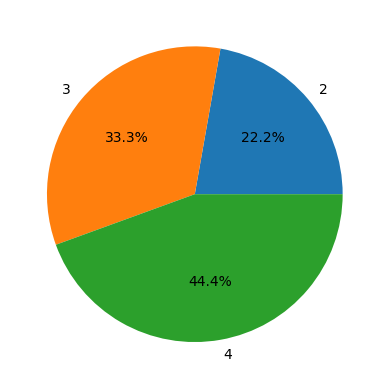

In [ ]:
def f1(x):
    return abs(x)

results_1 = calc_fitness(f1, x)
draw_piechart(results_1, x)
print('selection probability')
print(results_1)

### x^2

fitness scores
[4, 9, 16]
selection probability
[0.13793103 0.31034483 0.55172414]


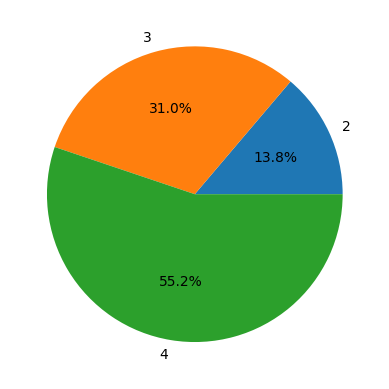

In [ ]:
def f2(x):
    return x**2

results_2 = calc_fitness(f2, x)
draw_piechart(results_2, x)
print('selection probability')
print(results_2)

### (x^2) * 2

fitness scores
[8, 18, 32]
selection probability
[0.13793103 0.31034483 0.55172414]


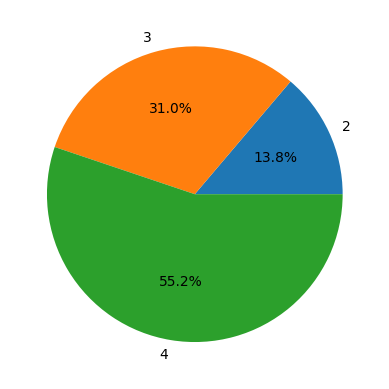

In [ ]:
def f3(x):
    return (x**2) * 2

results_3 = calc_fitness(f3, x)
draw_piechart(results_3, x)
print('selection probability')
print(results_3)

### (x^2) + 20

fitness scores
[24, 29, 36]
selection probability
[0.26966292 0.3258427  0.40449438]


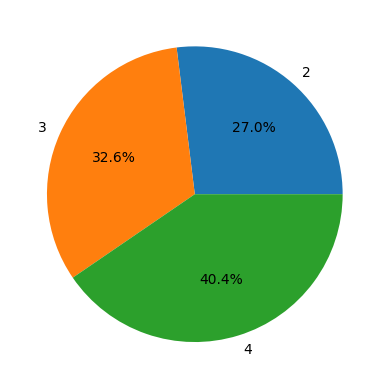

In [ ]:
def f4(x):
    return (x**2) + 20

results_4 = calc_fitness(f4, x)
draw_piechart(results_4, x)
print('selection probability')
print(results_4)

# Task 2

### Functions

In [ ]:
def generate_sequence(length):
    sequence = ""
    for i in range(length):
        sequence += str(random.randint(0, 1))
    return sequence

In [ ]:
def invert_bits(sequence, mu):
    new_sequence = ''
    for bit in sequence:
        prob = random.random()
        if prob < mu:
            if bit == '0':
                new_sequence += '1'
            else:
                new_sequence += '0'
        else:
            new_sequence += bit
    return new_sequence

In [ ]:
def calc_fitness(sequence):
    return sequence.count('1')

In [ ]:
def next_generation(sequence, mu, compare):
    xm = invert_bits(sequence, mu)
    fitness_sequence = calc_fitness(sequence)
    fitness_xm = calc_fitness(xm)

    if compare == True:
        if (fitness_sequence < fitness_xm):
            return xm, fitness_xm
        return sequence, fitness_sequence
    else:
        return xm, fitness_xm

### Take best solution

In [ ]:
length = 100
mu = 1/length
epochs = 1500
fitnesses = []

sequence = generate_sequence(length)
for i in range(epochs):
    sequence, fitness = next_generation(sequence, mu, True)
    fitnesses.append(fitness)

### Always exchange solution

Text(0, 0.5, 'Fitness')

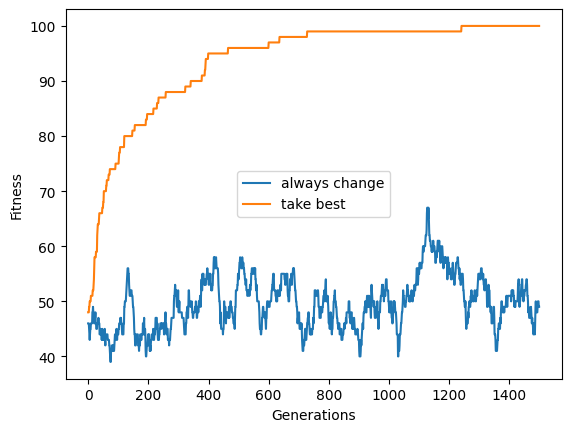

In [ ]:
length = 100
mu = 1/length
epochs = 1500
fitnesses2 = []

sequence = generate_sequence(length)
for i in range(epochs):
    sequence, fitness = next_generation(sequence, mu, False)
    fitnesses2.append(fitness)

plt.plot(fitnesses2, label='always change')
plt.plot(fitnesses, label='take best')
plt.legend()
plt.xlabel('Generations')
plt.ylabel('Fitness')

In [ ]:
convergence_generations_always_replacement = []
convergence_generations_best_replacement = []

initial_sequence = generate_sequence(length)

for exp in range(10):
    best_gen = 1500
    sequence = initial_sequence
    for i in range(epochs):
        sequence, fitness = next_generation(sequence, mu, True)
        if fitness == 100:
            best_gen = i + 1
            break
    convergence_generations_best_replacement.append(best_gen)

    best_gen = 1500
    sequence = initial_sequence
    for i in range(epochs):
        sequence, fitness = next_generation(sequence, mu, False)
        if fitness == 100:
            best_gen = i + 1
            break
    convergence_generations_always_replacement.append(best_gen)


convergence_generations_always_replacement, convergence_generations_best_replacement



([1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500],
 [676, 834, 805, 870, 1500, 641, 677, 912, 854, 1146])

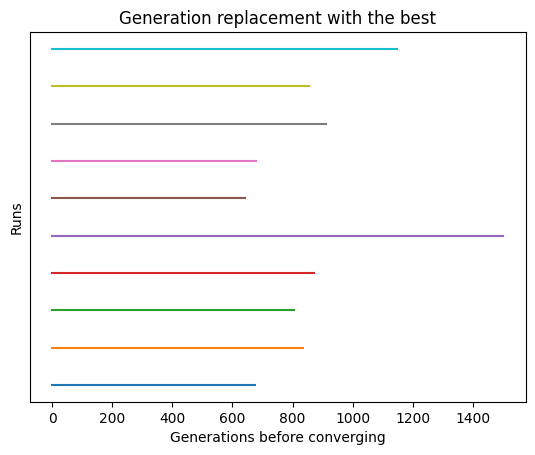

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Define the length of the lines
line_lengths = convergence_generations_best_replacement

for i, length in enumerate(line_lengths):
    # Plot the first line
    ax.plot([0, length], [(i + 1) * 0.1, (i + 1) * 0.1], label=f'Run {i + 1}', )

# Set labels and title
ax.set_xlabel('Generations before converging')
ax.set_ylabel('Runs')
ax.set_title('Generation replacement with the best')
ax.set_yticks([])


# Display legend
# ax.legend()

# Show the plot
plt.show()

# Task 3

### Functions

In [ ]:
def fitness(sequence, target):
    count = 0
    for s1, t1 in zip(sequence, target):
        if s1 == t1:
            count = count + 1
    return count

In [ ]:
def generate_string(length, alphabet):
    return ''.join(random.choices(alphabet, k=length))

In [ ]:
def select_parent(population, K, target):
    subset = random.sample(population, k=K)
    best_fitness = 0
    best_candidate = subset[0]

    for s in subset:
        f = fitness(s, target)
        if best_fitness < f:
            best_fitness = f
            best_candidate = s
    return best_candidate

In [ ]:
def generate_children(parent1, parent2, pc, mu, alphabet):
    child1, child2 = crossover(parent1, parent2, pc)
    child1 = mutation(child1, mu, alphabet)
    child2 = mutation(child2, mu, alphabet)
    return child1, child2


def crossover(parent1, parent2, pc):
    split_point = random.randint(1, len(parent1) - 1)
    prob = random.random()
    if prob < pc:
        child1 = parent1[:split_point] + parent2[split_point:]
        child2 = parent2[:split_point] + parent1[split_point:]
    else:
        child1 = parent1
        child2 = parent2
    return child1, child2

def mutation(child, mu, alphabet):
    new_child = ''
    for letter in child:
        prob = random.random()
        if prob < mu:
            new_child += str(random.choices(alphabet, k=1)[0])
        else:
            new_child += letter
    return new_child

In [ ]:
def hamming_distance(population):
    distances = []
    subset = random.sample(population, k=100)
    for i in range(len(subset)):
        for j in range(i+1, len(subset)):
            distances.append(hamming(list(subset[i]),list(subset[j])))
    return np.mean(distances)

In [ ]:
def simulation(target, length, alphabet, pc, mu, N, K, max_generations):
    population = [generate_string(length, alphabet) for i in range(N)]
    epochs = 0
    diversity = []
    while target not in population and epochs < max_generations:
        new_generation = []
        for i in range(int(N/2)):
            parent1 = select_parent(population, K, target)
            parent2 = select_parent(population, K, target)
            new_generation.extend(generate_children(parent1, parent2, pc, mu, alphabet))
        population = new_generation
        if (epochs+1)% 10 == 0:
            diversity.append(hamming_distance(population))
        epochs += 1
    return epochs, diversity, population

In [ ]:
def draw_sequence_logo(population):
    counts_list = []
    for i in range(len(p[0])):
        counts = Counter(string[i] for string in p)
        counts_list.append(dict(counts))
    counts_matrix = [[counts.get(chr(char), 0) for char in range(ord('A'), ord('z') + 1)] for counts in counts_list]
    column_names = [chr(char) for char in range(ord('A'), ord('z') + 1)]
    df_counts = pd.DataFrame(counts_matrix, columns=column_names)
    logo = logomaker.Logo(df_counts, color_scheme='skylign_protein')

    logo.ax.set_ylabel('count at position')
    logo.ax.set_xlabel('position')

### 1/Length

In [ ]:
target = 'Kakistocratical'
length = len(target)
alphabet = list(string.ascii_lowercase) + list(string.ascii_uppercase)
pc = 1
mu_1 = 1/length
N = 200
K = 2
max_generations = 100

epochs_to_target_1 = []
diversity_1 = []
population_1 = []
for i in range(10):
    e,d, p = simulation(target, length, alphabet, pc, mu_1, N, K, max_generations)
    epochs_to_target_1.append(e)
    if len(d) < 10:
       d = np.concatenate((d, np.full((10-len(d),), np.nan)))
    diversity_1.append(d)
    population_1.append(p)

print(epochs_to_target_1)
print(diversity_1)
mean_diversity_1 = np.nanmean(diversity_1, axis = 0)
mean_diversity_1

[55, 61, 44, 37, 60, 67, 49, 82, 45, 46]
[array([0.86712458, 0.72338047, 0.55478788, 0.47107071, 0.44977778,
              nan,        nan,        nan,        nan,        nan]), array([0.84133333, 0.66681481, 0.54118519, 0.4786532 , 0.51127273,
       0.42355556,        nan,        nan,        nan,        nan]), array([0.82541414, 0.68113131, 0.56185859, 0.48491582,        nan,
              nan,        nan,        nan,        nan,        nan]), array([0.87181145, 0.66263973, 0.53721212,        nan,        nan,
              nan,        nan,        nan,        nan,        nan]), array([0.88224916, 0.68789226, 0.55050505, 0.46086195, 0.44461953,
       0.44794613,        nan,        nan,        nan,        nan]), array([0.85617508, 0.72109091, 0.52775758, 0.48308418, 0.4776431 ,
       0.47832997,        nan,        nan,        nan,        nan]), array([0.81146128, 0.65909764, 0.56374411, 0.47221549,        nan,
              nan,        nan,        nan,        nan,        nan]), array(

<ipython-input-97-9aab8ee92bda>:23: RuntimeWarning: Mean of empty slice
  mean_diversity_1 = np.nanmean(diversity_1, axis = 0)


array([0.8585899 , 0.68818451, 0.55190707, 0.48597681, 0.47279192,
       0.44857239, 0.45274074, 0.48961616,        nan,        nan])

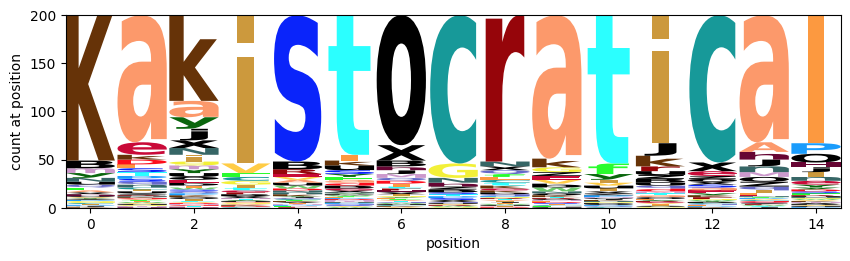

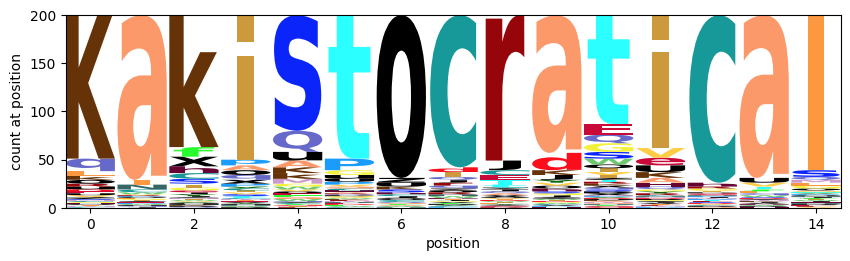

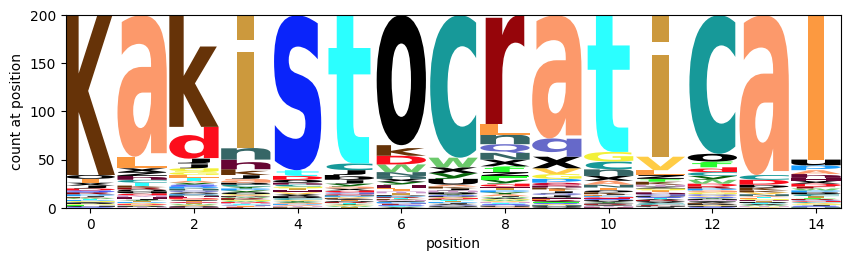

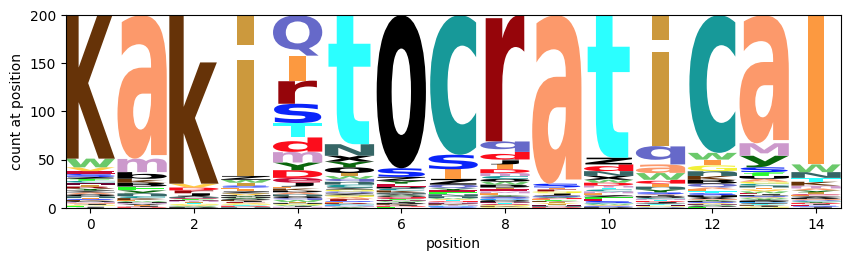

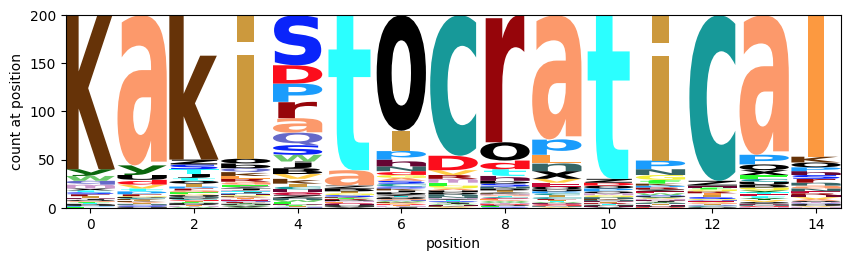

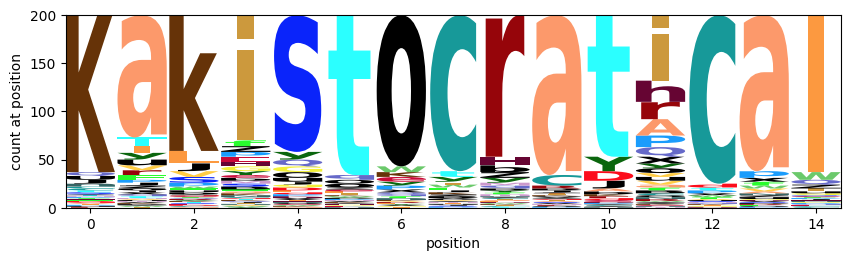

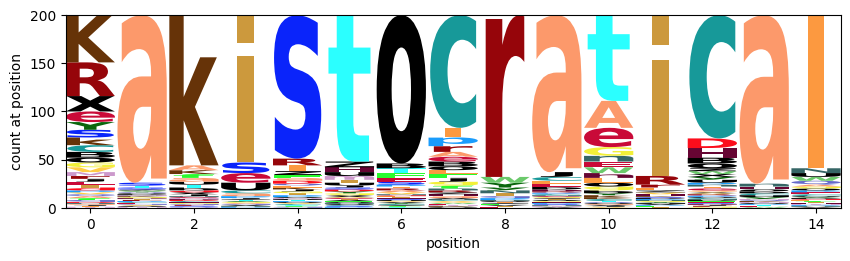

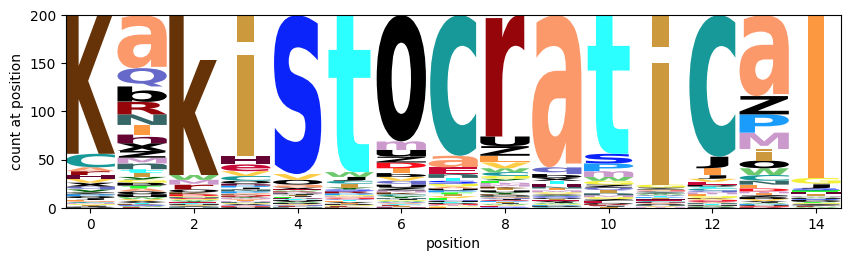

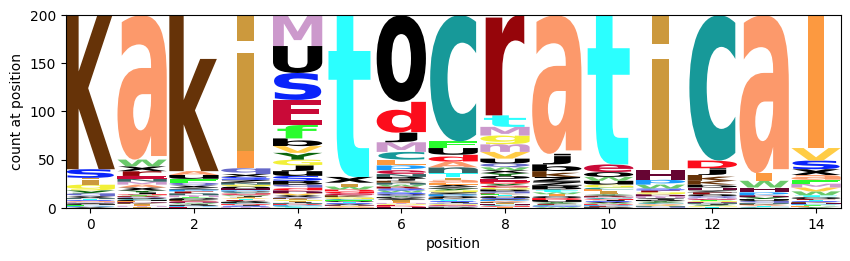

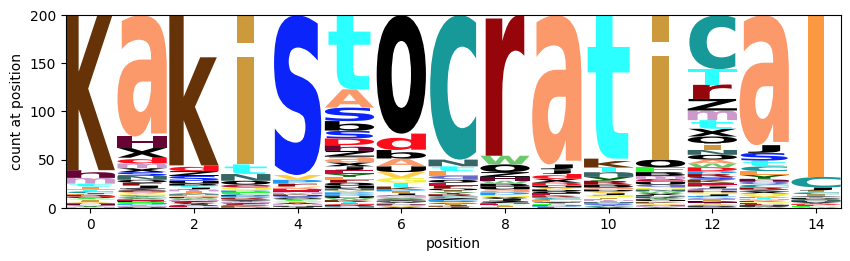

In [ ]:
for p in population_1:
    draw_sequence_logo(p)

### 0

In [ ]:
target = 'Kakistocratical'
length = len(target)
alphabet = list(string.ascii_lowercase) + list(string.ascii_uppercase)
pc = 1
mu_2 = 0
N = 200
K = 2
max_generations = 100

epochs_to_target_2 = []
diversity_2 = []
population_2 = []
for i in range(10):
    e,d,p = simulation(target, length, alphabet, pc, mu_2, N, K, max_generations)
    epochs_to_target_2.append(e)
    if len(d) < 10:
       d = np.concatenate((d, np.full((10-len(d),), np.nan)))
    diversity_2.append(d)
    population_2.append(p)

print(epochs_to_target_2)
print(diversity_2)
mean_diversity_2 = np.nanmean(diversity_2, axis = 0)
mean_diversity_2

[100, 100, 100, 100, 100, 100, 100, 26, 100, 100]
[[0.7331447811447812, 0.33586531986531987, 0.11834343434343433, 0.10962962962962962, 0.09566329966329966, 0.09414141414141412, 0.0826936026936027, 0.10507744107744105, 0.11703703703703702, 0.10568350168350168], [0.7958383838383839, 0.3408350168350168, 0.10122558922558922, 0.09948821548821547, 0.09618855218855218, 0.1047946127946128, 0.09929966329966329, 0.08945454545454544, 0.0848080808080808, 0.06362289562289562], [0.7448619528619529, 0.35507070707070704, 0.14153535353535351, 0.13845117845117844, 0.1259393939393939, 0.11924579124579124, 0.10518518518518517, 0.10344781144781144, 0.10219528619528619, 0.10118518518518517], [0.7127811447811448, 0.28498316498316495, 0.035676767676767675, 0.031407407407407405, 0.024686868686868684, 0.03468013468013468, 0.029306397306397305, 0.03318518518518518, 0.03361616161616161, 0.033656565656565655], [0.7893602693602694, 0.3658585858585859, 0.1024107744107744, 0.08571043771043771, 0.0732121212121212, 0.0

array([0.7215367 , 0.32874882, 0.09363412, 0.08141414, 0.07055294,
       0.07282005, 0.06634493, 0.06587804, 0.06618481, 0.05904078])

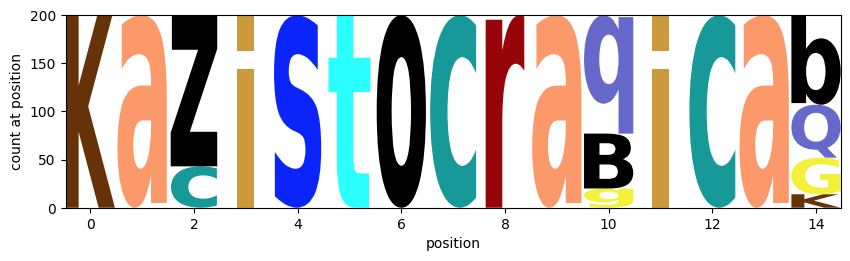

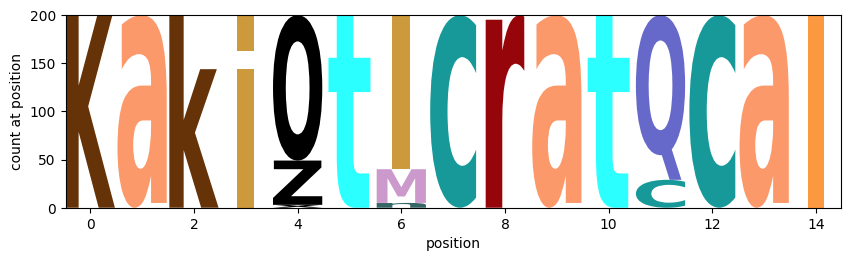

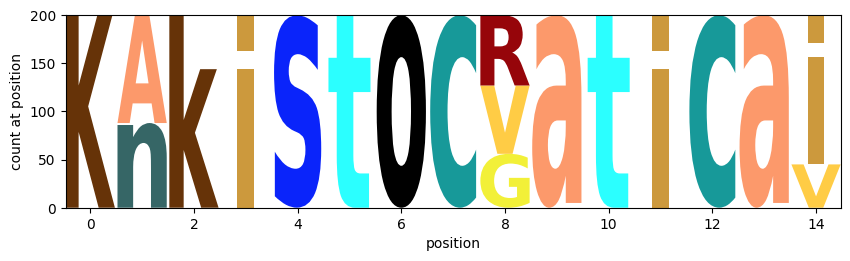

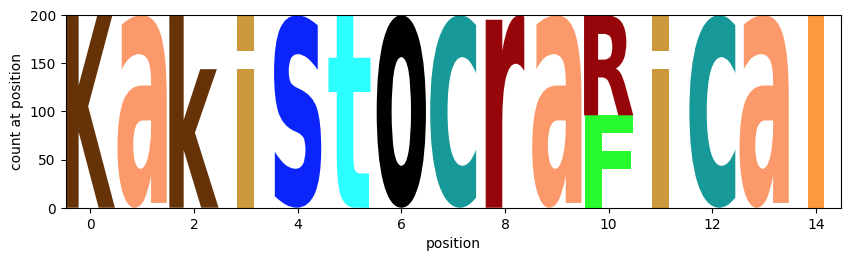

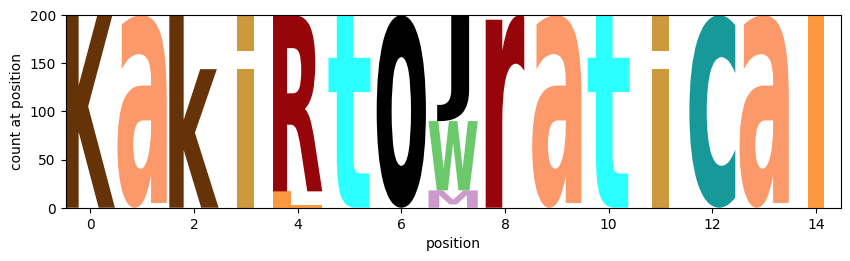

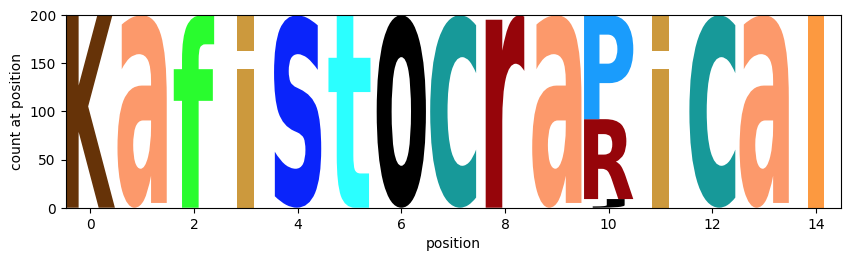

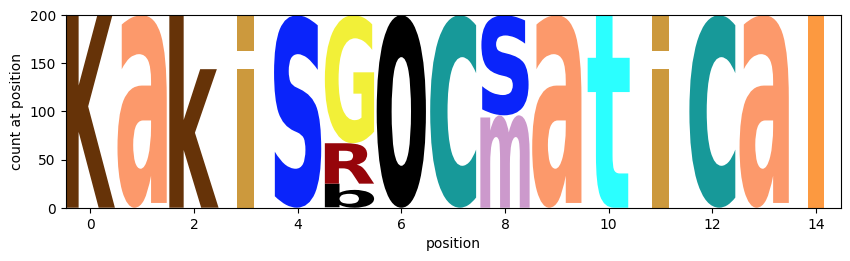

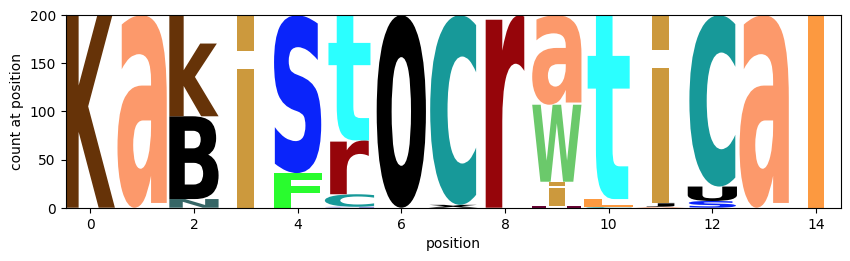

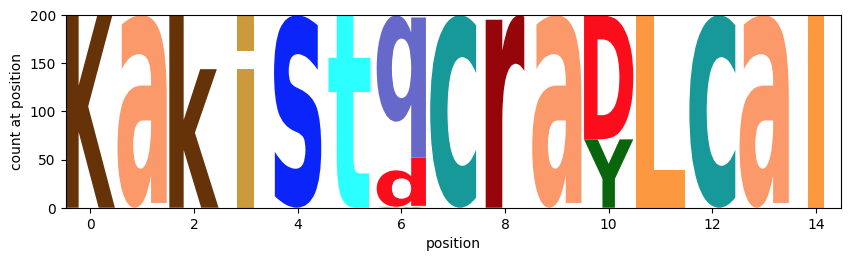

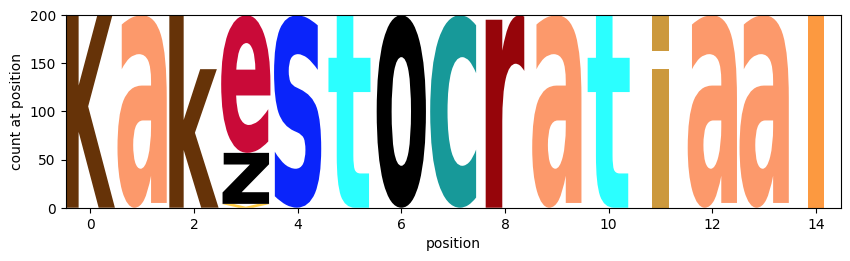

In [ ]:
for p in population_2:
    draw_sequence_logo(p)

### 3/Length

In [ ]:
target = 'Kakistocratical'
length = len(target)
alphabet = list(string.ascii_lowercase) + list(string.ascii_uppercase)
pc = 1
mu_3 = 3/length
N = 200
K = 2
max_generations = 100

epochs_to_target_3 = []
diversity_3 = []
population_3 = []
for i in range(10):
    e,d,p = simulation(target, length, alphabet, pc, mu_3, N, K, max_generations)
    epochs_to_target_3.append(e)
    if len(d) < 10:
       d = np.concatenate((d, np.full((10-len(d),), np.nan)))
    diversity_3.append(d)
    population_3.append(p)

print(epochs_to_target_3)
print(diversity_3)
mean_diversity_3 = np.nanmean(diversity_3, axis = 0)
mean_diversity_3

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
[[0.938006734006734, 0.9257777777777778, 0.9131178451178453, 0.9085791245791247, 0.9196902356902358, 0.9364713804713803, 0.9363905723905723, 0.9295353535353537, 0.9245521885521885, 0.923070707070707], [0.9483097643097643, 0.9339797979797979, 0.9231380471380473, 0.9367946127946127, 0.9211178451178452, 0.9134949494949494, 0.9350976430976431, 0.9140875420875422, 0.9226936026936028, 0.9271649831649833], [0.952794612794613, 0.9223569023569024, 0.9093737373737375, 0.9128215488215489, 0.9079326599326599, 0.938801346801347, 0.9202020202020202, 0.9308821548821549, 0.9317441077441078, 0.9263973063973064], [0.946114478114478, 0.9336430976430979, 0.9099797979797981, 0.9164579124579125, 0.9223569023569024, 0.9155824915824916, 0.9204309764309764, 0.9330235690235691, 0.9149898989898991, 0.9126464646464647], [0.9407542087542088, 0.9382895622895622, 0.9260202020202021, 0.9159730639730641, 0.917872053872054, 0.9164579124579125, 0.9255757575757576, 0.915

array([0.94627609, 0.92905993, 0.91933468, 0.92114343, 0.91957845,
       0.91822896, 0.92565791, 0.92288485, 0.92036633, 0.91772525])

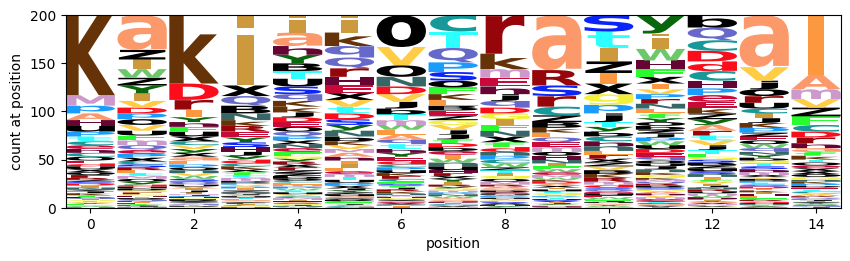

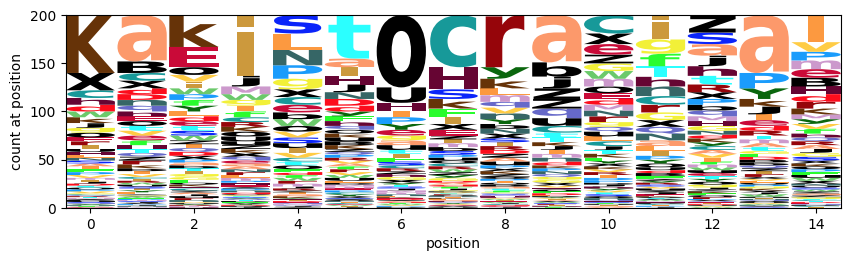

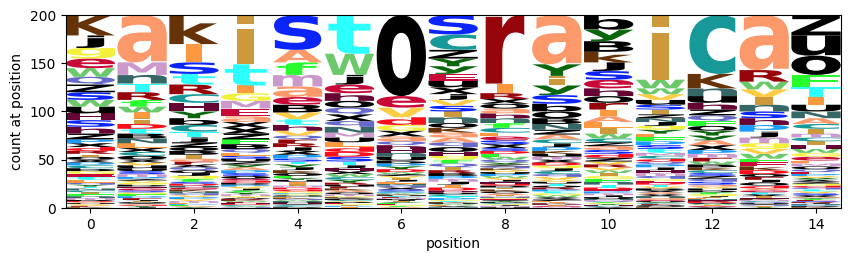

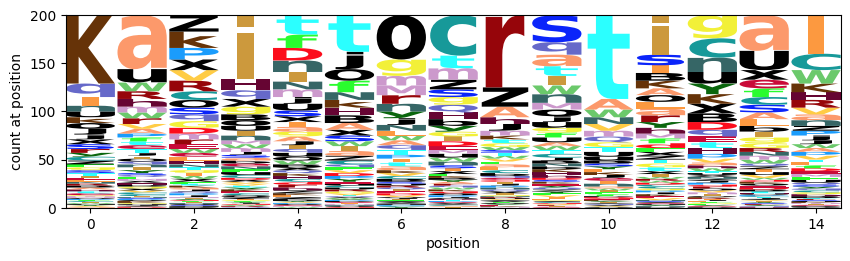

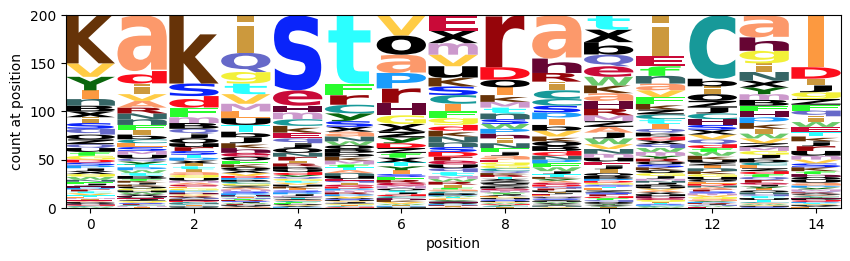

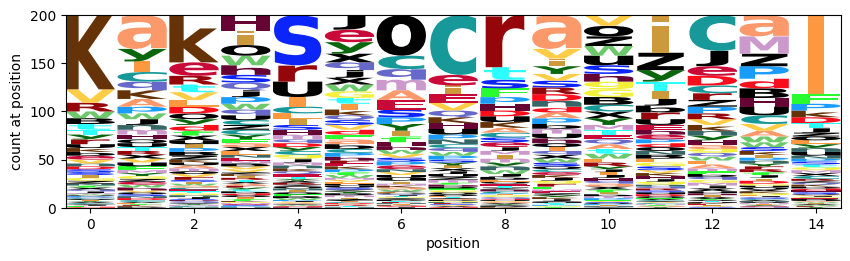

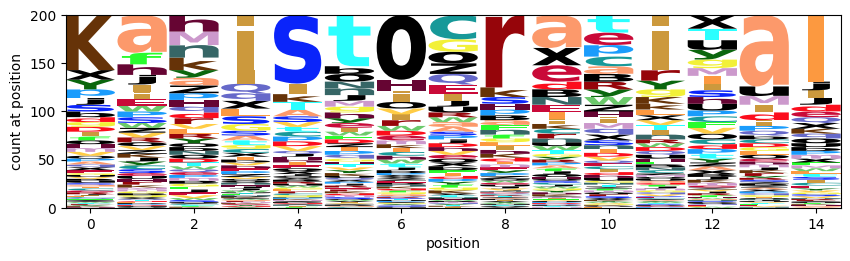

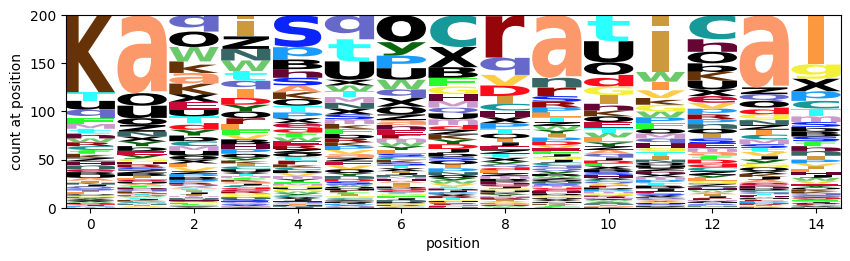

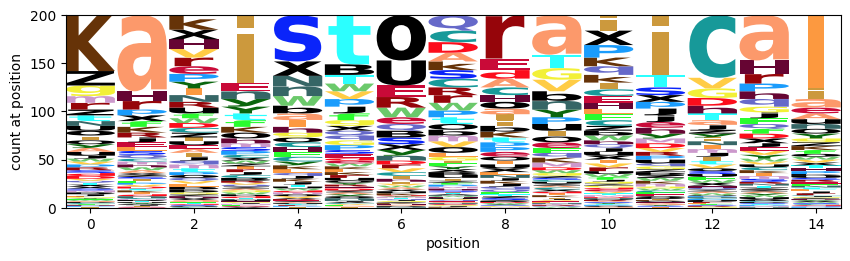

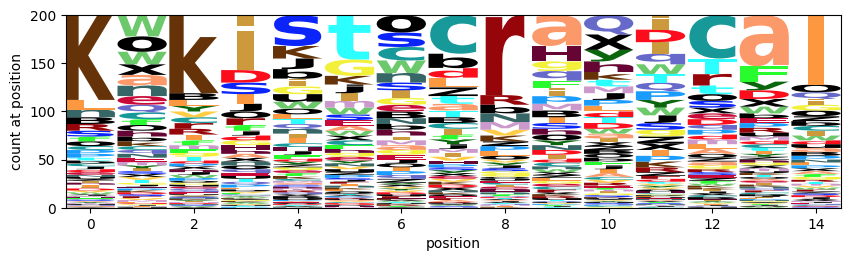

In [ ]:
for p in population_3:
    draw_sequence_logo(p)

### Comparision Plot

<Axes: xlabel='mu', ylabel='epochs'>

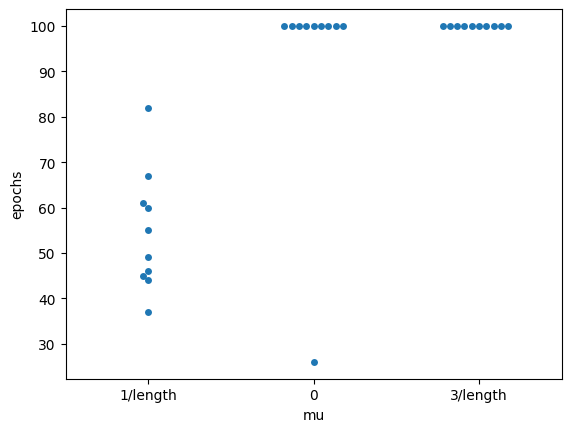

In [ ]:
data = {'mu': ['1/length'] * 10 + ['0'] * 10 + ['3/length'] * 10,
        'epochs': np.concatenate([epochs_to_target_1, epochs_to_target_2, epochs_to_target_3])}
df = pd.DataFrame(data)

seaborn.swarmplot(x='mu',
                  y='epochs', data = df)

Text(0, 0.5, 'Diversity Score')

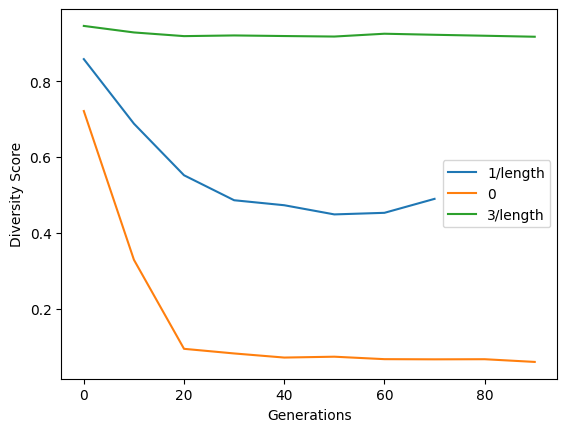

In [ ]:
x_values = range(0, 100, 10)
plt.plot(x_values, mean_diversity_1, label='1/length')
plt.plot(x_values, mean_diversity_2, label='0')
plt.plot(x_values, mean_diversity_3, label='3/length')
plt.legend()
plt.xlabel('Generations')
plt.ylabel('Diversity Score')

### Different mu K = 2

In [ ]:
target = 'Kakistocratical'
length = len(target)
alphabet = list(string.ascii_lowercase) + list(string.ascii_uppercase)
pc = 1
mu = [0, 0.01, 0.03, 0.05, 1/length, 0.08, 0.1, 2/length, 0.2, 0.3, 1/2, 1]
N = 200
K = 2
max_generations = 100

epochs_to_target = []
diversity = []

for m in mu:
    current_epochs = []
    current_diversity = []
    for i in range(10):
        e,d,_ = simulation(target, length, alphabet, pc, m, N, K, max_generations)
        current_epochs.append(e)
        current_diversity.append(d)
    epochs_to_target.append(current_epochs)
    diversity.append(current_diversity)

print(epochs_to_target)
diversity

[[27, 25, 100, 100, 100, 100, 25, 100, 100, 100], [52, 53, 73, 100, 70, 40, 31, 97, 65, 100], [65, 46, 45, 39, 78, 56, 34, 39, 27, 38], [58, 37, 42, 46, 35, 66, 38, 40, 30, 65], [46, 59, 92, 79, 54, 36, 78, 68, 35, 37], [80, 75, 73, 50, 86, 89, 60, 76, 54, 64], [100, 100, 67, 100, 92, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]]


[[[0.6638249158249159, 0.24770370370370368],
  [0.7725656565656566, 0.3777104377104377],
  [0.7805791245791245,
   0.29911111111111116,
   0.10114478114478113,
   0.09167676767676766,
   0.08352861952861952,
   0.07338720538720539,
   0.08627609427609427,
   0.056255892255892254,
   0.06041750841750842,
   0.07878787878787878],
  [0.7307609427609427,
   0.2788821548821549,
   0.10148148148148146,
   0.08662626262626262,
   0.06088888888888888,
   0.06564309764309764,
   0.05536700336700336,
   0.06611447811447811,
   0.07051851851851852,
   0.06518518518518518],
  [0.7064242424242425,
   0.3336296296296296,
   0.07472053872053873,
   0.05923232323232324,
   0.06324579124579124,
   0.04844444444444444,
   0.05682154882154882,
   0.038329966329966325,
   0.034101010101010104,
   0.033279461279461284],
  [0.737858585858586,
   0.2354208754208754,
   0.10474074074074075,
   0.09567676767676767,
   0.0866936026936027,
   0.08214141414141414,
   0.06802693602693602,
   0.07292929292929293,
 

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='mu', ylabel='epochs'>

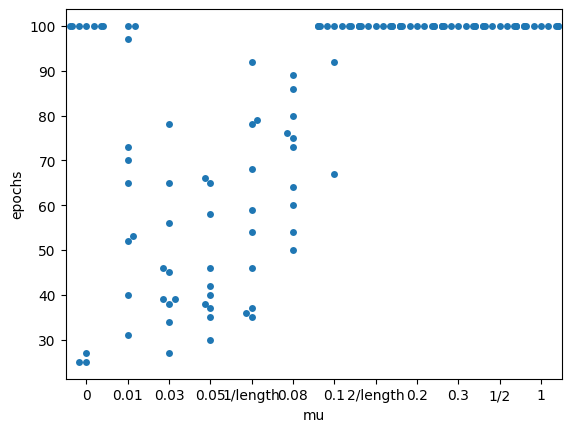

In [ ]:
data = {'mu': ['0'] * 10 + ['0.01'] * 10 + ['0.03'] * 10 + ['0.05'] * 10 + ['1/length'] * 10 + ['0.08'] * 10 + ['0.1'] * 10 + ['2/length'] * 10 + ['0.2'] * 10 + ['0.3'] * 10 + ['1/2'] * 10 + ['1'] * 10,
        'epochs': epochs_to_target[0] + epochs_to_target[1] + epochs_to_target[2]+ epochs_to_target[3]+ epochs_to_target[4]+ epochs_to_target[5]+ epochs_to_target[6]+ epochs_to_target[7]+ epochs_to_target[8]+ epochs_to_target[9] +  epochs_to_target[10] +  epochs_to_target[11]}
df = pd.DataFrame(data)

seaborn.swarmplot(x='mu',
                  y='epochs', data = df)

### Different mu K = 5

In [ ]:
target = 'Kakistocratical'
length = len(target)
alphabet = list(string.ascii_lowercase) + list(string.ascii_uppercase)
pc = 1
mu = [0, 0.01, 0.03, 0.05, 1/length, 0.08, 0.1, 2/length, 0.2, 0.3, 1/2, 1]
N = 200
K = 5
max_generations = 100

epochs_to_target = []
diversity = []

for m in mu:
    current_epochs = []
    current_diversity = []
    for i in range(10):
        e,d,_ = simulation(target, length, alphabet, pc, m, N, K, max_generations)
        current_epochs.append(e)
        current_diversity.append(d)
    epochs_to_target.append(current_epochs)
    diversity.append(current_diversity)

print(epochs_to_target)
diversity

[[100, 15, 100, 100, 100, 100, 100, 100, 100, 100], [20, 57, 83, 42, 83, 38, 20, 29, 100, 46], [42, 37, 48, 22, 41, 63, 35, 17, 23, 17], [31, 16, 15, 23, 18, 30, 20, 24, 24, 18], [18, 24, 25, 27, 24, 21, 20, 39, 27, 18], [19, 41, 24, 29, 34, 18, 24, 17, 17, 32], [23, 47, 17, 30, 17, 33, 17, 22, 24, 22], [37, 33, 24, 31, 80, 31, 23, 31, 33, 28], [100, 100, 100, 89, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]]


[[[0.25740067340067335,
   0.03232323232323232,
   0.02154882154882155,
   0.005171717171717172,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.3844713804713805],
  [0.257023569023569,
   0.07804713804713805,
   0.07164983164983164,
   0.07107070707070706,
   0.07241750841750841,
   0.07256565656565657,
   0.06748821548821547,
   0.0642962962962963,
   0.0696161616161616,
   0.06901010101010101],
  [0.2303973063973064,
   0.16506397306397305,
   0.15846464646464645,
   0.14658585858585857,
   0.15360269360269357,
   0.1436228956228956,
   0.1480808080808081,
   0.12942760942760945,
   0.1183164983164983,
   0.08945454545454544],
  [0.3801750841750842,
   0.09007407407407407,
   0.09381818181818181,
   0.0726060606060606,
   0.06386531986531986,
   0.05842424242424241,
   0.04798653198653199,
   0.04106397306397306,
   0.01255218855218855,
   0.026262626262626262],
  [0.23881481481481479,
   0.07115151515151516,
   0.07924579124579124,
   0.058195286195286196,
   0.05733333333333

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='mu', ylabel='epochs'>

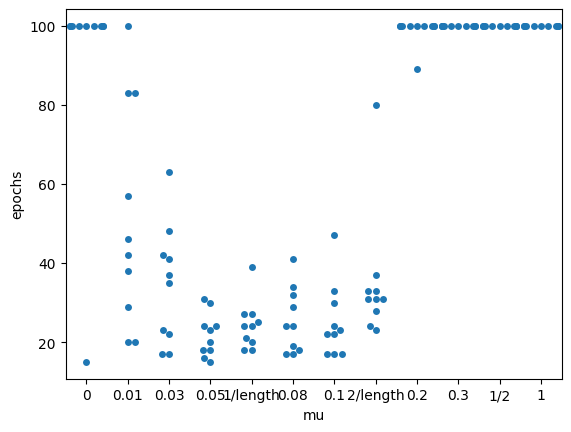

In [ ]:
data = {'mu': ['0'] * 10 + ['0.01'] * 10 + ['0.03'] * 10 + ['0.05'] * 10 + ['1/length'] * 10 + ['0.08'] * 10 + ['0.1'] * 10 + ['2/length'] * 10 + ['0.2'] * 10 + ['0.3'] * 10 + ['1/2'] * 10 + ['1'] * 10,
        'epochs': epochs_to_target[0] + epochs_to_target[1] + epochs_to_target[2]+ epochs_to_target[3]+ epochs_to_target[4]+ epochs_to_target[5]+ epochs_to_target[6]+ epochs_to_target[7]+ epochs_to_target[8]+ epochs_to_target[9] +  epochs_to_target[10] +  epochs_to_target[11]}
df = pd.DataFrame(data)

seaborn.swarmplot(x='mu',
                  y='epochs', data = df)